# Multiple Linear Regression

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


Drop the unwanted columns which we will not be required in the model.

In [24]:
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


Now, we will check for *NULL* values.

In [25]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

Let's do some visualization

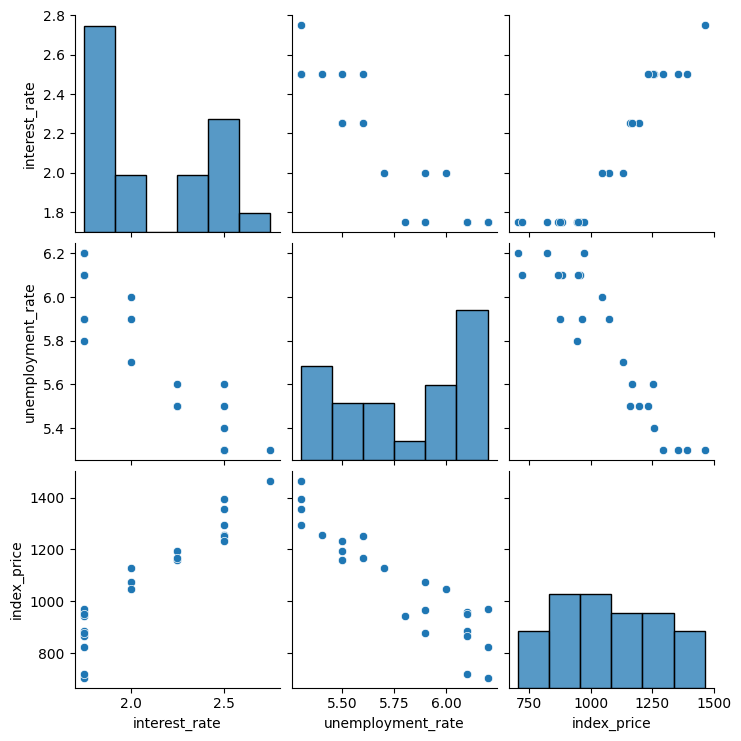

In [26]:
import seaborn as sns
sns.pairplot(df)

Let's create Correlation Matrix using <strong>Seaborn</strong>

<Axes: >

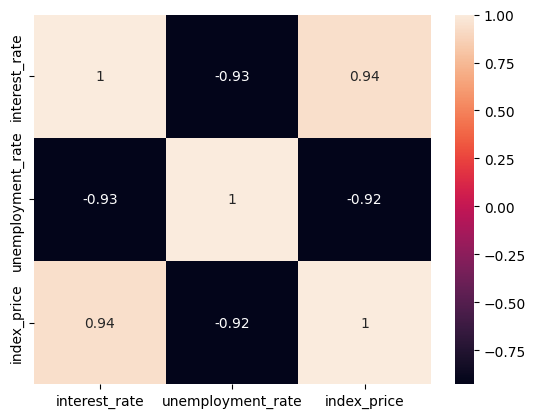

In [27]:
sns.heatmap(df.corr(), annot=True)

Now, we will get our *Independent* and *Dependent features*

In [28]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(f"Shape of X: ", X.shape)
print(f"Shape of y: ", y.shape)

Shape of X:  (24, 2)
Shape of y:  (24,)


#### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (18, 2)
Shape of X_test: (6, 2)
Shape of y_train: (18,)
Shape of y_test: (6,)


*Note*: Checkout *regplot* from <strong>Seaborn</strong><br>
Now, we will apply *Standardization*.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [31]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

#### Creating Linear Regression model

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Let's use *cross_val_score*<br>
It will take the following parameters i.e.
- The Regression Model
- X_train
- y_train
- scoring criteria (metric which will be used)
- Number of cross validations (Integer)

In [36]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
validation_score.mean()

np.float64(-5914.828180162386)

#### Predictions

In [37]:
y_pred = model.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

Performance Metrics

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 8108.567426306604
Mean Absolute Error: 73.80444932337097
Root Mean Squared Error: 90.04758423359621


In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7591371539010257

In [40]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.5985619231683761

#### Assumptions

In [42]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


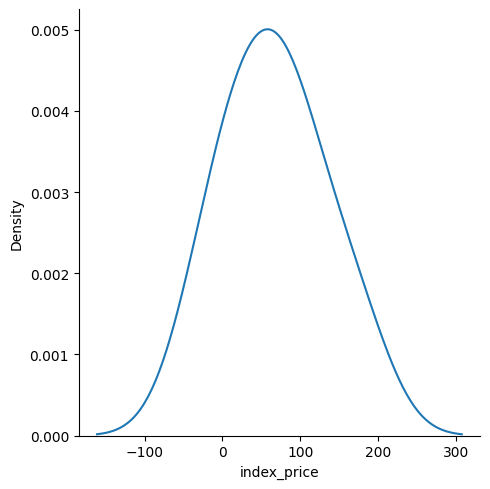

In [43]:
# Plotting the residuals
sns.displot(residuals, kind='kde')

If a *Normal Distribution* curve is coming, then that means our model is good.
## Multiple Linear Regression OLS

In [44]:
import statsmodels.api as sm

olsmodel = sm.OLS(y_train, X_train).fit()

In [45]:
predictions = olsmodel.predict(X_test)
predictions

array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [46]:
print(olsmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 26 Jul 2025   Prob (F-statistic):                       0.754
Time:                        00:15:00   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Finally, compare the values of *Intercept* and *Coefficient* with one's of *OLS* model.